# Tensor Flow Model Multi-Category Classification

Multi-Category Classification (0/1/2, A/B/C, Yes/No/Maybe, etc)

### Getting Started

Dataset

Iris Dataset from SKLearn

`from sklearn.datasets import load_iris`



### Clean, Manipulate and Prepare the data

#### Train Test Split

For Multi-Category Classifications the categories have to split the Target into independent columns

```
X = df.drop('target', axis=1).values

# One Hot Encode the Target Values
y = pd.get_dummies(df['target']).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
```

#### Scaling the data

```
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
```

### Training the model

#### Instantiation

`model = Sequential()`

#### Layers

Activation functions is `relu`

The number of units can be up adjusted


#### Output Layer

Units of the output layer should be equivalent to the target categories

The activation function changes to `softmax`

Ex Dataset has 3 outcomes (A,B,C)

Output Layer

`model.add(Dense(3,activation='softmax'))`

#### Compile

Loss metric for categorical classification is `categorical_crossentropy`

```
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
```


### Evaluations and Predictions

We can evaluate the training data and the test data

```
model.evaluate(X_test, y_test, verbose=1)
model.evaluate(X_train, y_train, verbose=1)
```

Predictions for multi-category classification are a little different than sklearn

```
# Run predictions
predictions = model.predict(X_test)

# Get the position of the higest value in the array
actual = np.argmax(y_test, axis=1)
preds = np.argmax(predictions, axis=1)

# Run the reports
print(confusion_matrix(actual, preds))
print(classification_report(actual, preds))
```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris

### Create DataFrame from Data

In [3]:
data = load_iris()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target'] = data.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

### Train Test Split

In [11]:
X = df[df.columns[:-1]].values

y = pd.get_dummies(df['target']).values

In [12]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_test

array([[0.63888889, 0.375     , 0.61016949, 0.5       ],
       [0.5       , 0.33333333, 0.50847458, 0.5       ],
       [0.66666667, 0.45833333, 0.57627119, 0.54166667],
       [0.80555556, 0.5       , 0.84745763, 0.70833333],
       [0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.02777778, 0.5       , 0.05084746, 0.04166667],
       [0.36111111, 0.375     , 0.44067797, 0.5       ],
       [0.41666667, 0.29166667, 0.69491525, 0.75      ],
       [0.72222222, 0.45833333, 0.74576271, 0.83333333],
       [0.19444444, 0.5       , 0.03389831, 0.04166667],
       [0.25      , 0.875     , 0.08474576, 0.        ],
       [0.66666667, 0.45833333, 0.77966102, 0.95833333],
       [0.19444444, 0.125     , 0.38983051, 0.375     ],
       [0.47222222, 0.41666667, 0.6440678 , 0.70833333],
       [0.52777778, 0.33333333, 0.6440678 , 0.70833333],
       [0.94444444, 0.33333333, 0.96610169, 0.79166667],
       [0.66666667, 0.41666667, 0.71186441, 0.91666667],
       [0.47222222, 0.08333333,

In [16]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

### Build our Model

Hidden Layers
- 3 Layers
- 4 units per layer
- 'relu' for the activation

Compile
- Adam optimizer
- loss: categorical_crossentropy
- metrics: accuracy

Callbacks - Early Stopping

In [18]:
model_1 = Sequential()

model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(4, activation='relu'))

# Output layer is slightly different
model_1.add(Dense(3, activation='softmax'))

# Compile
model_1.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

history_1 = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=250,
    callbacks=[es]
)

Epoch 1/250
4/4 [==============================] - 2s 139ms/step - loss: 1.1036 - accuracy: 0.3048 - val_loss: 1.0311 - val_accuracy: 0.4000
Epoch 2/250
4/4 [==============================] - 0s 23ms/step - loss: 1.0953 - accuracy: 0.3048 - val_loss: 1.0257 - val_accuracy: 0.4000
Epoch 3/250
4/4 [==============================] - 0s 21ms/step - loss: 1.0868 - accuracy: 0.3048 - val_loss: 1.0208 - val_accuracy: 0.4000
Epoch 4/250
4/4 [==============================] - 0s 22ms/step - loss: 1.0805 - accuracy: 0.3048 - val_loss: 1.0163 - val_accuracy: 0.4000
Epoch 5/250
4/4 [==============================] - 0s 22ms/step - loss: 1.0729 - accuracy: 0.3048 - val_loss: 1.0118 - val_accuracy: 0.4000
Epoch 6/250
4/4 [==============================] - 0s 17ms/step - loss: 1.0662 - accuracy: 0.3048 - val_loss: 1.0073 - val_accuracy: 0.4000
Epoch 7/250
4/4 [==============================] - 0s 17ms/step - loss: 1.0594 - accuracy: 0.3048 - val_loss: 1.0030 - val_accuracy: 0.4000
Epoch 8/250
4/4 [==

In [21]:
def plot_losses(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  plt.plot(loss, label='loss')
  plt.plot(val_loss, label='val_loss')
  plt.title('Losses')
  plt.legend()

  plt.figure()
  plt.plot(accuracy, label='accuracy')
  plt.plot(val_accuracy, label='val_accuracy')
  plt.title('Accuracies')
  plt.legend()


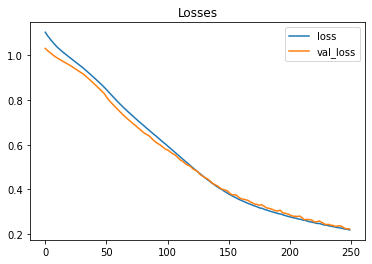

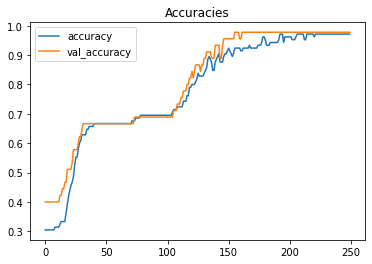

In [22]:
plot_losses(history_1)

In [23]:
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.2233 - accuracy: 0.9778


[0.22325725853443146, 0.9777777791023254]

### Predictions

In [24]:
prediction_1 = model_1.predict(X_test)

In [25]:
prediction_1

array([[3.09736794e-03, 7.00808406e-01, 2.96094179e-01],
       [7.54925655e-03, 7.56699204e-01, 2.35751569e-01],
       [2.99567706e-03, 7.53749430e-01, 2.43254930e-01],
       [1.97802307e-04, 2.43978947e-01, 7.55823255e-01],
       [9.93208587e-01, 4.31841146e-03, 2.47298251e-03],
       [9.90338981e-01, 6.27690880e-03, 3.38410633e-03],
       [1.82505790e-02, 7.46857285e-01, 2.34892115e-01],
       [1.04088290e-03, 2.54984915e-01, 7.43974209e-01],
       [2.50556361e-04, 2.14769676e-01, 7.84979761e-01],
       [9.91561949e-01, 5.42951934e-03, 3.00853350e-03],
       [9.96147037e-01, 2.38787942e-03, 1.46513863e-03],
       [1.06237749e-04, 1.10293277e-01, 8.89600515e-01],
       [5.75446002e-02, 7.11030543e-01, 2.31424868e-01],
       [1.86426681e-03, 4.60768104e-01, 5.37367582e-01],
       [1.44384196e-03, 3.83709282e-01, 6.14846885e-01],
       [2.05844972e-05, 5.41845299e-02, 9.45794940e-01],
       [2.17323395e-04, 1.61524311e-01, 8.38258445e-01],
       [1.72758021e-03, 2.86820

In [26]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=uint8)

In [27]:
pred_1 = np.argmax(prediction_1, axis=1)

In [28]:
pred_1

array([1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1,
       0])

In [29]:
actual = np.argmax(y_test, axis=1)

In [30]:
actual

array([1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1,
       0])

In [31]:
confusion_matrix(actual, pred_1)

array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 18]])

In [32]:
print(classification_report(actual, pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [33]:
test_data = df.loc[0]

In [34]:
test_data

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
target               0.0
Name: 0, dtype: float64

In [35]:
test_data = test_data.drop('target').values.reshape(-1,4)

In [36]:
test_data

array([[5.1, 3.5, 1.4, 0.2]])

In [37]:
test_data = scaler.transform(test_data)

In [38]:
test_data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667]])

In [39]:
test_pred = model_1.predict(test_data)

In [40]:
test_pred

array([[0.9932086 , 0.00431841, 0.00247298]], dtype=float32)

In [41]:
np.argmax(test_pred)

0

In [43]:
test_data = df.loc[149]

In [44]:
test_data

sepal length (cm)    5.9
sepal width (cm)     3.0
petal length (cm)    5.1
petal width (cm)     1.8
target               2.0
Name: 149, dtype: float64

In [45]:
test_data = test_data.drop('target').values.reshape(-1,4)

In [46]:
test_data = scaler.transform(test_data)

In [47]:
test_pred = model_1.predict(test_data)

In [48]:
np.argmax(test_pred)

2